In [1]:
import pandas as pd
import os
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
warnings.filterwarnings("ignore")
os.chdir(r"C:\Users\ezkiska\Videos\Imarticus\Python\5th Week 4th & 5th Jan\SVM  project band credit")
data_original = pd.read_csv('BankCreditCard.csv')

In [2]:
data = data_original

In [3]:
data.head()

,Customer ID,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,1
1,2,220000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,24332.0,14848.0,15548.0,1619.0,2500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,29324.0,28858.0,28547.0,3000.0,2029.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,18146.0,18131.0,3000.0,36672.0,10000.0,9000.0,689.0,679.0,0


In [4]:
# list all columns (for reference)
data.columns

Index(['Customer ID', 'Credit_Amount', 'Gender', 'Academic_Qualification',
       'Marital', 'Age_Years', 'Repayment_Status_Jan', 'Repayment_Status_Feb',
       'Repayment_Status_March', 'Repayment_Status_April',
       'Repayment_Status_May', 'Repayment_Status_June', 'Jan_Bill_Amount',
       'Feb_Bill_Amount', 'March_Bill_Amount', 'April_Bill_Amount',
       'May_Bill_Amount', 'June_Bill_Amount', 'Previous_Payment_Jan',
       'Previous_Payment_Feb', 'Previous_Payment_March',
       'Previous_Payment_April', 'Previous_Payment_May',
       'Previous_Payment_June', 'Default_Payment'],
      dtype='object')

In [5]:
#  Default_Payment (response)
data = data.drop(['Customer ID'], axis = 1)
data.isnull().sum()

Credit_Amount             0
Gender                    0
Academic_Qualification    0
Marital                   0
Age_Years                 0
Repayment_Status_Jan      0
Repayment_Status_Feb      0
Repayment_Status_March    0
Repayment_Status_April    0
Repayment_Status_May      0
Repayment_Status_June     0
Jan_Bill_Amount           0
Feb_Bill_Amount           0
March_Bill_Amount         0
April_Bill_Amount         0
May_Bill_Amount           0
June_Bill_Amount          0
Previous_Payment_Jan      0
Previous_Payment_Feb      0
Previous_Payment_March    0
Previous_Payment_April    0
Previous_Payment_May      0
Previous_Payment_June     0
Default_Payment           0
dtype: int64

In [6]:
data.describe()

,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
count,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000
mean,1.929173e+05,1.603733,1.855933,1.551867,35.485500,0.355200,0.319300,0.302967,0.25670,0.219500,...,55122.263933,39939.618800,38506.051533,6285.653867,7.466544e+03,5836.140567,5127.687433,5261.19120,5215.502567,0.221200
std,1.322888e+05,0.489129,0.794397,0.521970,9.217904,0.746984,0.796012,0.781792,0.74388,0.699954,...,83577.329356,60373.934792,59104.280171,18944.920299,3.467950e+04,20696.306703,17103.762740,16989.50685,17777.465775,0.415062
min,2.000000e+04,1.000000,1.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,-270000.000000,-81334.000000,-338603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000
25%,5.000000e+04,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,2671.500000,1763.000000,1256.000000,1000.000000,7.700000e+02,550.000000,333.000000,310.00000,117.750000,0.000000
50%,2.200000e+05,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,25629.000000,18043.000000,17071.000000,3000.000000,2.542000e+03,1900.000000,1500.000000,1539.00000,1500.000000,0.000000
75%,2.700000e+05,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,54508.500000,50190.500000,48655.250000,6000.000000,5.000000e+03,5500.000000,4013.250000,5000.00000,4000.000000,0.000000
max,2.000000e+06,2.000000,6.000000,3.000000,79.000000,6.000000,6.000000,6.000000,6.00000,6.000000,...,992596.000000,827171.000000,861664.000000,973663.000000,2.674259e+06,999055.000000,538897.000000,536539.00000,528666.000000,1.000000


In [7]:
catCols = ["Gender", "Academic_Qualification", "Marital", "Repayment_Status_Jan", "Repayment_Status_Feb",
            "Repayment_Status_March", "Repayment_Status_April", "Repayment_Status_May", "Repayment_Status_June",
            "Default_Payment"]

## EDA

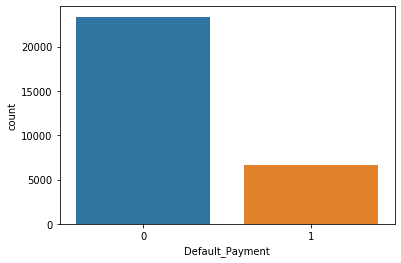

In [8]:
## Target variable -------------------------------------------------------------------

sns.countplot(x=data['Default_Payment'])

In [9]:
# percentage of 0's and 1's
np.round(data.Default_Payment.value_counts()/data.shape[0],2)
# to get percentage simply divide feature value count with data shape or dimension and we can also round off
## imbalanced data: We observe that data is imbalanced here

0    0.78
1    0.22
Name: Default_Payment, dtype: float64

In [10]:
# """EDA categorical independent features"""# ------------------------------------------------

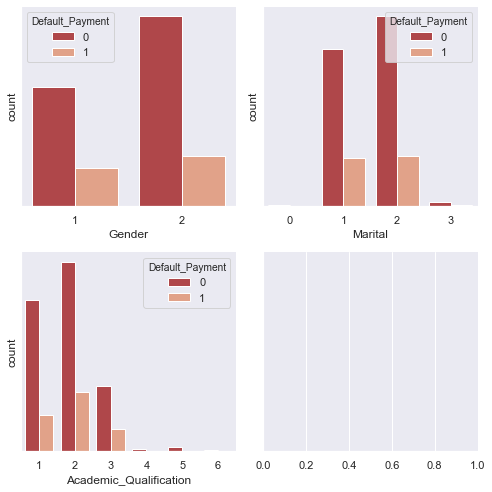

In [12]:

# Set up the matplotlib figure
sns.set(style='darkgrid', palette='RdBu', font='sans-serif', font_scale=1, color_codes=True, rc=None)

#'''https://seaborn.pydata.org/generated/seaborn.set.html'''

f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=False) #Controls sharing of properties among x (sharex) 
#or y (sharey) axes:

#'''  True or 'all': x- or y-axis will be shared among all subplots.
#False or 'none': each subplot x- or y-axis will be independent.
#'row': each subplot row will share an x- or y-axis.
#'col': each subplot column will share an x- or y-axis.'''

sns.despine(left=False)

#'''seaborn.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
#Remove the top and right spines from plot(s).'''

sns.countplot(x=data['Gender'], hue = 'Default_Payment', data = data, ax = axes[0][0])
sns.countplot(x=data['Academic_Qualification'], hue = 'Default_Payment', data = data, ax = axes[1][0])
sns.countplot(x=data['Marital'],  hue = 'Default_Payment', data = data, ax = axes[0][1])
plt.setp(axes, yticks=[])
plt.tight_layout()


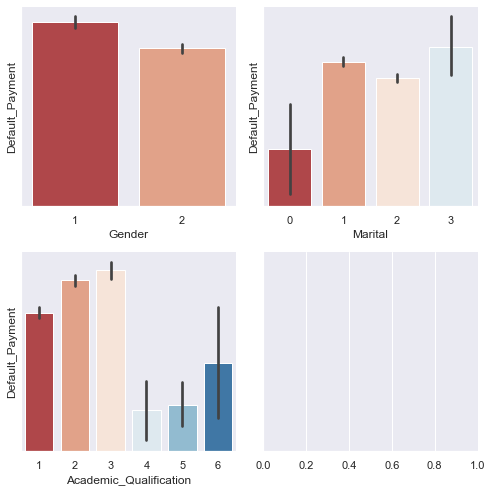

In [13]:
#"""  BOX PLOT APPROACH for above but to show X vs Y i.e. Dependent vs Independent variable  """

sns.set(style='darkgrid', palette='RdBu', font='sans-serif', font_scale=1, color_codes=True, rc=None)
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=False) #Controls sharing of properties among x (sharex) 
sns.despine(left=False)
sns.barplot(x=data['Gender'], y=data['Default_Payment'], data = data, ax = axes[0][0])
sns.barplot(x=data['Academic_Qualification'], y=data['Default_Payment'], data = data, ax = axes[1][0])
sns.barplot(x=data['Marital'], y=data['Default_Payment'], data = data, ax = axes[0][1])
plt.setp(axes, yticks=[])
plt.tight_layout()

Now We will create Function to check proportions of our data for each categorical variable 

In [14]:
def createProportions(df,colName, dependentColName):
    
    tab = pd.crosstab(df[colName],  df[dependentColName],margins = False)
    prop = []
    for i in range(tab.shape[0]):
        value = tab.iloc[i,1]/tab.iloc[i,0]
        prop.append(value)
    tab['prop'] = prop

    return tab

In [15]:
createProportions(data,'Marital', 'Default_Payment')

Default_Payment,0,1,prop
Marital,,,
0,49,5,0.102041
1,10453,3206,0.306706
2,12623,3341,0.264676
3,239,84,0.351464


In [16]:
createProportions(data,'Academic_Qualification', 'Default_Payment')

Default_Payment,0,1,prop
Academic_Qualification,,,
1,8549,2036,0.238157
2,10700,3330,0.311215
3,3680,1237,0.336141
4,116,7,0.060345
5,262,18,0.068702
6,57,8,0.140351


In [17]:
createProportions(data,'Gender', 'Default_Payment')

Default_Payment,0,1,prop
Gender,,,
1,9015,2873,0.318691
2,14349,3763,0.262248


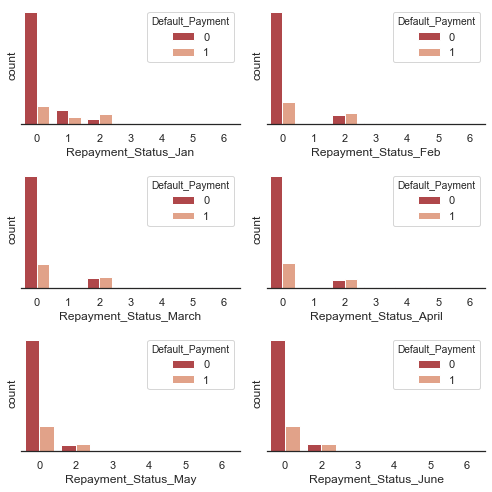

In [18]:
# Set up the matplotlib figure
sns.set(style="white", palette="RdBu", color_codes=True)
f, axes = plt.subplots(3, 2, figsize=(7, 7), sharex=False)
sns.despine(left=True)
sns.countplot(x=data['Repayment_Status_Jan'], hue = 'Default_Payment', data = data, ax = axes[0][0])
sns.countplot(x=data['Repayment_Status_Feb'], hue = 'Default_Payment', data = data, ax = axes[0][1])
sns.countplot(x=data['Repayment_Status_March'],  hue = 'Default_Payment', data = data, ax = axes[1][0])
sns.countplot(x=data['Repayment_Status_April'], hue = 'Default_Payment', data = data, ax = axes[1][1])
sns.countplot(x=data['Repayment_Status_May'], hue = 'Default_Payment', data = data, ax = axes[2][0])
sns.countplot(x=data['Repayment_Status_June'],  hue = 'Default_Payment', data = data, ax = axes[2][1])
plt.setp(axes, yticks=[])
plt.tight_layout()

In [19]:
createProportions(data,'Repayment_Status_Jan', 'Default_Payment')

Default_Payment,0,1,prop
Repayment_Status_Jan,,,
0,19975,3207,0.160551
1,2436,1252,0.513957
2,823,1844,2.240583
3,78,244,3.128205
4,24,52,2.166667
5,13,13,1.000000
6,15,24,1.600000


In [20]:
createProportions(data,'Repayment_Status_Feb', 'Default_Payment')

Default_Payment,0,1,prop
Repayment_Status_Feb,,,
0,21402,4160,0.194374
1,23,5,0.217391
2,1743,2184,1.253012
3,125,201,1.608000
4,49,50,1.020408
5,10,15,1.500000
6,12,21,1.750000


In [21]:
createProportions(data,'Repayment_Status_March', 'Default_Payment')

Default_Payment,0,1,prop
Repayment_Status_March,,,
0,21353,4434,0.207652
1,3,1,0.333333
2,1850,1969,1.064324
3,102,138,1.352941
4,32,44,1.375000
5,9,12,1.333333
6,15,38,2.533333


In [22]:
createProportions(data,'Repayment_Status_April', 'Default_Payment')

Default_Payment,0,1,prop
Repayment_Status_April,,,
0,21733,4757,0.218884
1,1,1,1.000000
2,1506,1653,1.097610
3,70,110,1.571429
4,23,46,2.000000
5,17,18,1.058824
6,14,51,3.642857


In [23]:
createProportions(data,'Repayment_Status_May', 'Default_Payment')

Default_Payment,0,1,prop
Repayment_Status_May,,,
0,22045,4987,0.226219
2,1203,1423,1.182876
3,65,113,1.738462
4,33,51,1.545455
5,7,10,1.428571
6,11,52,4.727273


In [24]:
createProportions(data,'Repayment_Status_June', 'Default_Payment')

Default_Payment,0,1,prop
Repayment_Status_June,,,
0,21896,5025,0.229494
2,1365,1401,1.026374
3,66,118,1.787879
4,18,31,1.722222
5,6,7,1.166667
6,13,54,4.153846


In [25]:
# group the academic levels as 1,2 and >= 3  OR 0(1) and 1(2,3,4) but 2nd technique will not be proper 
# due to distribution of target values in 2 and 3, let's see what happens afetr technique 1
# 
''' So We will create a clubbing fuctions and club the levels
0,1 will remain and 2 on owards will be clubbed as 2 itself for all 
Rapayment status months'''
#

' So We will create a clubbing fuctions and club the levels\n0,1 will remain and 2 on owards will be clubbed as 2 itself for all \nRapayment status months'

In [26]:
def club(df, feature, a, b, newValue):
    
    for i in range(a, b):
        df[feature][df[feature] == i] = newValue
    
    x = df[feature].value_counts()
    
    return x

def labelCh(df, feature, a, b):
    
    for i in range(a, b):
        df[feature][df[feature] == i] = i-1
    
    x = df[feature].value_counts()
    
    return x

In [27]:
club(data, 'Repayment_Status_Jan', 2, 7, 1)

0    23182
1     6818
Name: Repayment_Status_Jan, dtype: int64

In [28]:
club(data, 'Repayment_Status_Feb', 2, 7, 1)

0    25562
1     4438
Name: Repayment_Status_Feb, dtype: int64

In [29]:
club(data, 'Repayment_Status_March', 2, 7, 1)

0    25787
1     4213
Name: Repayment_Status_March, dtype: int64

In [30]:
club(data, 'Repayment_Status_April', 2, 7, 1)

0    26490
1     3510
Name: Repayment_Status_April, dtype: int64

In [31]:
club(data, 'Repayment_Status_May', 2, 7, 1)

0    27032
1     2968
Name: Repayment_Status_May, dtype: int64

In [32]:
club(data, 'Repayment_Status_June', 2, 7, 1)

0    26921
1     3079
Name: Repayment_Status_June, dtype: int64

In [33]:
print(data['Academic_Qualification'].value_counts())

2    14030
1    10585
3     4917
5      280
4      123
6       65
Name: Academic_Qualification, dtype: int64


In [34]:
club(data, 'Academic_Qualification', 4, 7, 3)

2    14030
1    10585
3     5385
Name: Academic_Qualification, dtype: int64

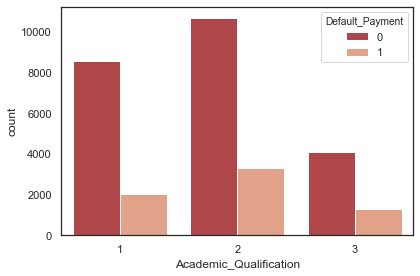

In [35]:
# Academic qualification has been clubbed and reduced to 3 levels, 1& 2 from initial values
#while 3 to 6 blevels have been clubbed to 3
sns.countplot(x=data['Academic_Qualification'], hue = 'Default_Payment', data = data)
plt.tight_layout()

In [36]:
data[['Academic_Qualification', 'Default_Payment']].groupby(['Academic_Qualification'],
    as_index=False).mean().sort_values(by='Academic_Qualification', ascending=True)

,Academic_Qualification,Default_Payment
0,1,0.192348
1,2,0.237349
2,3,0.235840


In [37]:
createProportions(data,'Academic_Qualification', 'Default_Payment') #call the function from above to check proportion

Default_Payment,0,1,prop
Academic_Qualification,,,
1,8549,2036,0.238157
2,10700,3330,0.311215
3,4115,1270,0.308627


In [38]:
# Here percentage conversion is the same for 2 and 3 levels
# group the academic levels as 0(1) and 1(2,3): makes sense post grad 
#approx.== professionals and elite classes
data['Academic_Qualification'][data['Academic_Qualification']==1] = 0
club(data, 'Academic_Qualification', 2, 4, 1)

1    19415
0    10585
Name: Academic_Qualification, dtype: int64

In [39]:
'''Working on Gender Encoding'''
# group the Gender levels as 0 and 1 instead of 1 and 2
labelCh(data, 'Gender', 1, 3)

1    18112
0    11888
Name: Gender, dtype: int64

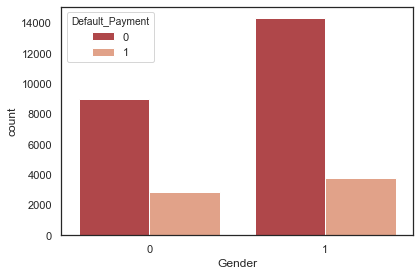

In [40]:
sns.countplot(x=data['Gender'], hue = 'Default_Payment', data = data)
plt.tight_layout()

In [41]:
data[['Gender', 'Default_Payment']].groupby(['Gender'],
    as_index=False).mean().sort_values(by='Gender', ascending=True)

,Gender,Default_Payment
0,0,0.241672
1,1,0.207763


In [42]:
'''Working on Marital Status Categorical data'''
# group the marital levels as (0,1) as 0 (due to proprotion of blue)
# and (2,3) as 1; (due to proprotion of red)
print(data['Marital'].value_counts())
club(data, 'Marital', 1, 2, 0)
club(data, 'Marital', 2, 4, 1)

2    15964
1    13659
3      323
0       54
Name: Marital, dtype: int64


1    16287
0    13713
Name: Marital, dtype: int64

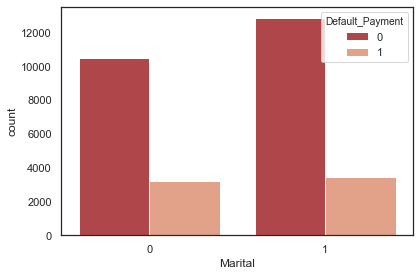

In [43]:
sns.countplot(x=data['Marital'], hue = 'Default_Payment', data = data)
plt.tight_layout()

In [44]:
data[['Marital', 'Default_Payment']].groupby(['Marital'],
    as_index=False).mean().sort_values(by='Marital', ascending=True)
'''After all the changes on Categorical plots We will summarize all the plots'''

'After all the changes on Categorical plots We will summarize all the plots'

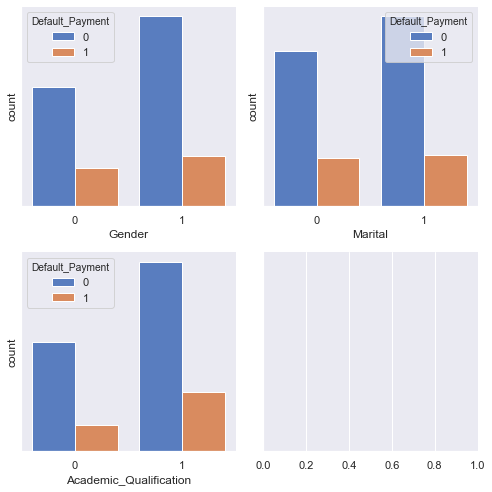

In [45]:
## Rechecking the plots
# Set up the matplotlib figure
sns.set(style='darkgrid', palette='muted', font='sans-serif', font_scale=1, color_codes=True, rc=None)
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=False) #Controls sharing of properties among x (sharex) 
sns.despine(left=False)
sns.countplot(x=data['Gender'], hue = 'Default_Payment', data = data, ax = axes[0][0])
sns.countplot(x=data['Academic_Qualification'], hue = 'Default_Payment', data = data, ax = axes[1][0])
sns.countplot(x=data['Marital'],  hue = 'Default_Payment', data = data, ax = axes[0][1])
plt.setp(axes, yticks=[])
plt.tight_layout()


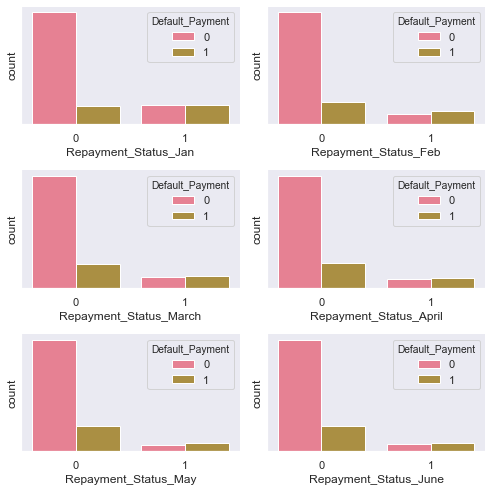

In [46]:
# Set up the matplotlib figure
sns.set(style='darkgrid', palette='husl', font='sans-serif', font_scale=1, color_codes=True, rc=None)
f, axes = plt.subplots(3, 2, figsize=(7, 7), sharex=False) #Controls sharing of properties among x (sharex) 
sns.despine(left=False)
sns.countplot(x=data['Repayment_Status_Jan'], hue = 'Default_Payment', data = data, ax = axes[0][0])
sns.countplot(x=data['Repayment_Status_Feb'], hue = 'Default_Payment', data = data, ax = axes[0][1])
sns.countplot(x=data['Repayment_Status_March'],  hue = 'Default_Payment', data = data, ax = axes[1][0])
sns.countplot(x=data['Repayment_Status_April'], hue = 'Default_Payment', data = data, ax = axes[1][1])
sns.countplot(x=data['Repayment_Status_May'], hue = 'Default_Payment', data = data, ax = axes[2][0])
sns.countplot(x=data['Repayment_Status_June'],  hue = 'Default_Payment', data = data, ax = axes[2][1])
plt.setp(axes, yticks=[])
plt.tight_layout()

In [47]:
'''Now we will drop the dependent variable from list of categorical features'''

dataCAT = data[catCols].drop(['Default_Payment'], axis = 1)

'''Let's Look at Numerical features now '''

In [48]:
### EDA - numerical features ----------------------------------------------------------------------
cols = data.columns.tolist()
numCols = [cols[i] for i in range(len(cols)) if i == 0 or i == 4] #names(data3)[c(1,5)
numCols2 = cols[11:-1] # Returns columns 12:23)] from data 
numCols.extend(numCols2)

In [49]:
'''Python list extend() is an inbuilt function that adds the specified list elements 
(or any iterable) to the end of the current list. 
The extend() extends the list by adding all items of the list (passed as an argument) to an end'''

dataNUM = data[numCols]

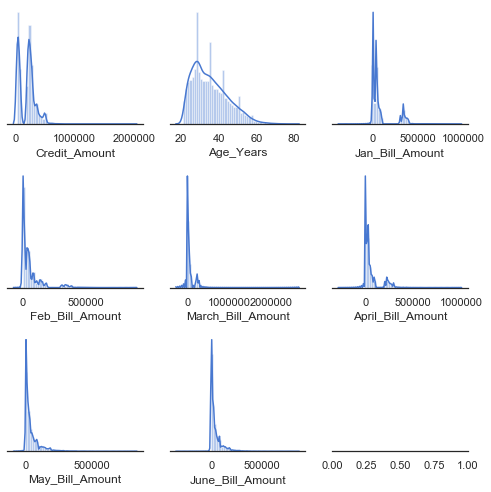

In [50]:
'''We will now see univariate Analysis on Numerical Data'''

# Univariate analysis
# Set up the matplotlib figure
'''  Credit_amount till June_bill_amount '''
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(3, 3, figsize=(7, 7), sharex=False)
sns.despine(left=True)
sns.distplot(dataNUM.iloc[:,0], ax = axes[0][0]) #dist plot all rown and a particular column here  0 which is credit Amount
sns.distplot(dataNUM.iloc[:,1], ax = axes[0][1])
sns.distplot(dataNUM.iloc[:,2], ax = axes[0][2])
sns.distplot(dataNUM.iloc[:,3], ax = axes[1][0])
sns.distplot(dataNUM.iloc[:,4], ax = axes[1][1])
sns.distplot(dataNUM.iloc[:,5], ax = axes[1][2])
sns.distplot(dataNUM.iloc[:,6], ax = axes[2][0])
sns.distplot(dataNUM.iloc[:,7], ax = axes[2][1])
plt.setp(axes, yticks=[])
plt.tight_layout()

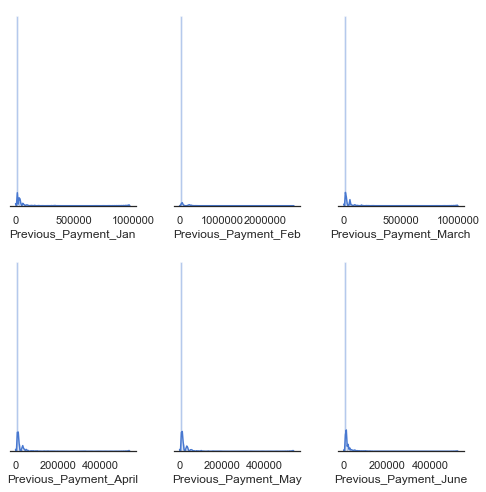

In [51]:
''' All previous_payments  '''
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2, 3, figsize=(7, 7), sharex=False)
sns.despine(left=True)
sns.distplot(dataNUM.iloc[:,8], ax = axes[0][0])
sns.distplot(dataNUM.iloc[:,9], ax = axes[0][1])
sns.distplot(dataNUM.iloc[:,10], ax = axes[0][2])
sns.distplot(dataNUM.iloc[:,11], ax = axes[1][0])
sns.distplot(dataNUM.iloc[:,12], ax = axes[1][1])
sns.distplot(dataNUM.iloc[:,13], ax = axes[1][2])
plt.setp(axes, yticks=[])
plt.tight_layout()

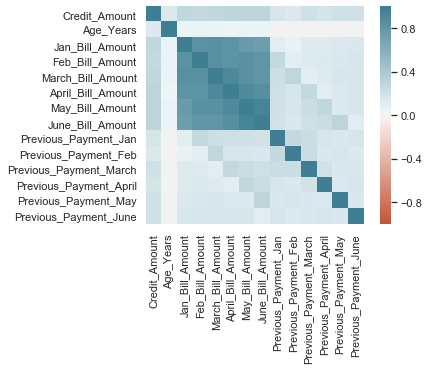

In [52]:
''' Let Us check Auto Correlattion between Numerical Features'''
# Credit, Jan-Bill, March-bill, April-bill, all Previous_payments
#sns.heatmap(dataNUM, cmap="YlGnBu")
corr = dataNUM.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')

In [53]:
#correlation is high among Bill_Amount, not Previous_Payments
dataNUM[['Jan_Bill_Amount','Feb_Bill_Amount']].corr().iloc[1,0]

0.8358633653688922

In [54]:
#drop all but June_Bills and June Previous_Payments
dataNUM.columns
# dropped columns are more
dataNUM = dataNUM[['Credit_Amount', 'Age_Years','June_Bill_Amount', 'Previous_Payment_June']]


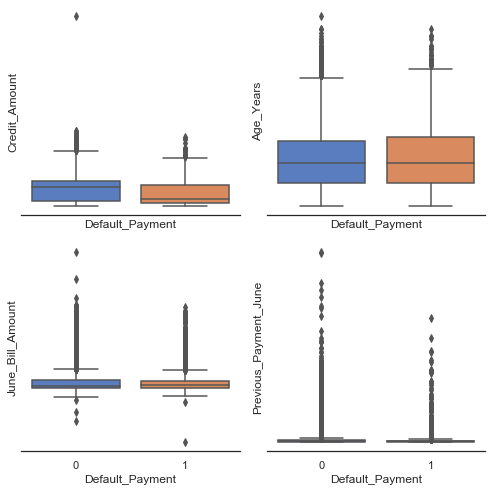

In [55]:
''''Now we will do outlier check'''

sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)
sns.boxplot(y = dataNUM.iloc[:,0], x = data['Default_Payment'], data = data, ax = axes[0][0])
sns.boxplot(y = dataNUM.iloc[:,1], x = data['Default_Payment'], data = data, ax = axes[0][1])
sns.boxplot(y = dataNUM.iloc[:,2], x = data['Default_Payment'], data = data, ax = axes[1][0])
sns.boxplot(y = dataNUM.iloc[:,3], x = data['Default_Payment'], data = data, ax = axes[1][1])
plt.setp(axes, yticks=[])
plt.tight_layout()

In [56]:
dataNUM_list = [dataNUM]

for dataset in dataNUM_list:
    dataset.loc[dataset.Credit_Amount < np.percentile(dataNUM['Credit_Amount'].values, 1), 
                'Credit_Amount' ] = np.percentile(dataNUM['Credit_Amount'].values, 1)
    dataset.loc[dataset.Credit_Amount > np.percentile(dataNUM['Credit_Amount'].values, 99), 
                'Credit_Amount' ] = np.percentile(dataNUM['Credit_Amount'].values, 99)
    
    dataset.loc[dataset.Age_Years < np.percentile(dataNUM['Age_Years'].values, 1), 
                'Age_Years' ] = np.percentile(dataNUM['Age_Years'].values, 1)
    dataset.loc[dataset.Age_Years > np.percentile(dataNUM['Age_Years'].values, 99),
                'Age_Years' ] = np.percentile(dataNUM['Age_Years'].values, 99)
    
    dataset.loc[dataset.June_Bill_Amount < np.percentile(dataNUM['June_Bill_Amount'].values, 1), 
                'June_Bill_Amount' ] = np.percentile(dataNUM['June_Bill_Amount'].values, 1)
    dataset.loc[dataset.June_Bill_Amount > np.percentile(dataNUM['June_Bill_Amount'].values, 99), 
                'June_Bill_Amount' ] = np.percentile(dataNUM['June_Bill_Amount'].values, 99)
    
    dataset.loc[dataset.Previous_Payment_June < np.percentile(dataNUM['Previous_Payment_June'].values, 1),
                'Previous_Payment_June' ] = np.percentile(dataNUM['Previous_Payment_June'].values, 1)
    dataset.loc[dataset.Previous_Payment_June > np.percentile(dataNUM['Previous_Payment_June'].values, 99),
                'Previous_Payment_June' ] = np.percentile(dataNUM['Previous_Payment_June'].values, 99)

In [57]:
def clubLabelEncoder(df, feature, k):
    
    df[feature +'_band'] = pd.qcut(df[feature], k)
    x = df[feature + '_band'].value_counts().index.tolist()
    
    intervals = []
    for i in range(len(x)):
        leftInt = x[i].left
        rtInt = x[i].right
        intervals.append(leftInt)
        intervals.append(rtInt)
    
    intervals_ = sorted(list(set(intervals)))
    
    for i in range(len(intervals_)-1):
        
        df.loc[(df[feature] > intervals_[i]) & (df[feature] <= intervals_[i+1]), feature] = i
    
    df = df.iloc[:,:-1]
    
    return df[feature].value_counts()


In [58]:
clubLabelEncoder(dataNUM, 'Age_Years', 4)
dataNUM['Age_Years'].value_counts()

0.0    8013
1.0    7683
3.0    7450
2.0    6854
Name: Age_Years, dtype: int64

In [59]:
clubLabelEncoder(dataNUM, 'Credit_Amount', 4)
dataNUM['Credit_Amount'].value_counts()

1.0    8863
0.0    7676
3.0    7182
2.0    6279
Name: Credit_Amount, dtype: int64

In [60]:
clubLabelEncoder(dataNUM, 'June_Bill_Amount', 4)
dataNUM['June_Bill_Amount'].value_counts()

0.0    7502
3.0    7500
2.0    7500
1.0    7498
Name: June_Bill_Amount, dtype: int64

In [61]:
clubLabelEncoder(dataNUM, 'Previous_Payment_June', 4)
dataNUM['Previous_Payment_June'].value_counts()


1.0    7742
0.0    7500
3.0    7483
2.0    7275
Name: Previous_Payment_June, dtype: int64

In [62]:
dataNUM = dataNUM.iloc[:,:-4] #removing four band columns from the last

In [64]:
dataCAT.iloc[:,0].value_counts() # already brinary,  no need for dummy encoding

1    18112
0    11888
Name: Gender, dtype: int64

In [65]:
df = pd.concat([dataCAT, dataNUM], axis = 1) # only independent deatures
df['Default_Payment'] = data['Default_Payment'] # add the target column


In [66]:
#------------------------- rectified data for SVM, scaled numercial features-------------
dataNUM_ = data[['Credit_Amount', 'Age_Years', 'June_Bill_Amount', 'Previous_Payment_June']]
df_ = pd.concat([dataCAT, dataNUM_], axis = 1)
df_['Default_Payment'] = data['Default_Payment'] 

In [67]:
## ---------------------------------------Modelling with SMOTE--------------------------------------------------------------------------------

'''SMOTE will take care of the oversampling stuff''' 

'''df_ has the numerical variables as they were originally along with the other discrete features #(clubbed them)'''
'''df has the categorized numerical features along with the other discrete features #(clubbed them)'''
'''df2 has the numerical variables as they were along with the other discrete features #(unclubbed)'''


from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE 
from sklearn.svm import SVC #Support vector classifier
from sklearn.metrics import roc_auc_score, roc_curve
import time


X = df_.iloc[:,0:-1]
y = df_['Default_Payment']

sm = SMOTE(random_state = 2) 
X_sm, y_sm = sm.fit_sample(X, y.ravel()) 

print('With imbalance treatment:'.upper())
print('Before SMOTE:',X.shape, y.shape)
print('After SMOTE, Xs: {}'.format(X_sm.shape)) 
print('After SMOTE, y: {}'.format(y_sm.shape)) 
print("After SMOTE, counts of '1': {}".format(sum(y_sm == 1))) 
print("After SMOTE, counts of '0': {}".format(sum(y_sm == 0))) 
print("Before SMOTE, counts of '1': {}".format(sum(y == 1))) 
print("Before SMOTE, counts of '0': {}".format(sum(y == 0))) 
print('\n')
print('*'*80)


#X_smU = [X_sm[i][:9] for i in range(len(X_sm))] #cat
#X_smS = [X_sm[i][9:] for i in range(len(X_sm))] #num

WITH IMBALANCE TREATMENT:
Before SMOTE: (30000, 13) (30000,)
After SMOTE, Xs: (46728, 13)
After SMOTE, y: (46728,)
After SMOTE, counts of '1': 23364
After SMOTE, counts of '0': 23364
Before SMOTE, counts of '1': 6636
Before SMOTE, counts of '0': 23364


********************************************************************************


In [68]:
X_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46728 entries, 0 to 46727
Data columns (total 13 columns):
Gender                    46728 non-null int64
Academic_Qualification    46728 non-null int64
Marital                   46728 non-null int64
Repayment_Status_Jan      46728 non-null int64
Repayment_Status_Feb      46728 non-null int64
Repayment_Status_March    46728 non-null int64
Repayment_Status_April    46728 non-null int64
Repayment_Status_May      46728 non-null int64
Repayment_Status_June     46728 non-null int64
Credit_Amount             46728 non-null float64
Age_Years                 46728 non-null int64
June_Bill_Amount          46728 non-null float64
Previous_Payment_June     46728 non-null float64
dtypes: float64(3), int64(10)
memory usage: 4.6 MB


In [69]:
X_smU= X_sm[['Gender','Academic_Qualification','Marital','Repayment_Status_Jan','Repayment_Status_Feb',
             'Repayment_Status_March','Repayment_Status_April','Repayment_Status_May','Repayment_Status_June']]  #categorical columns
X_smS= X_sm[['Credit_Amount','Age_Years','June_Bill_Amount','Previous_Payment_June']] #numerical columns

In [70]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range  =(-1,1)).fit(X_smS)
Xs_smS = scaler.transform(X_smS)

In [71]:
#X_sm = Xs_smS.tolist()

df1 = pd.DataFrame(columns = dataCAT.columns.tolist() , data = X_smU)
df2 = pd.DataFrame(columns = dataNUM.columns.tolist() , data = Xs_smS)

DF = pd.concat([df1, df2], axis = 1)
X_sm = DF.values

X_scaled = DF.iloc[:,0:-1] # scaled version
y_sm

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [72]:
#split into 70:30 ratio 
X_train_sm, X_val_sm, y_train_sm, y_val_sm = train_test_split(X_sm, y_sm, test_size = 0.3, random_state = 0)
# for scaled data use X_scaled instead of X_sm 


t1 = time.time()
# Naked Modelling

svm = SVC() #SVC(kernel='linear') 

clf = svm.fit(X_train_sm, y_train_sm.ravel()) 
score1 = svm.score(X_train_sm, y_train_sm)
score2 = svm.score(X_val_sm, y_val_sm)
pred = svm.predict(X_val_sm) 
  
# print classification report 
print('With SMOTE:'.upper())
print('train accuracy: ', score1)
print('test accuracy: ', score2)
print('F1 score:\n', classification_report(y_val_sm, pred)) 
print('*'*80)
#print('\n')

WITH SMOTE:
train accuracy:  0.6836039010669847
test accuracy:  0.6795063841928811
F1 score:
               precision    recall  f1-score   support

           0       0.68      0.66      0.67      6952
           1       0.68      0.70      0.69      7067

    accuracy                           0.68     14019
   macro avg       0.68      0.68      0.68     14019
weighted avg       0.68      0.68      0.68     14019

********************************************************************************


TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')

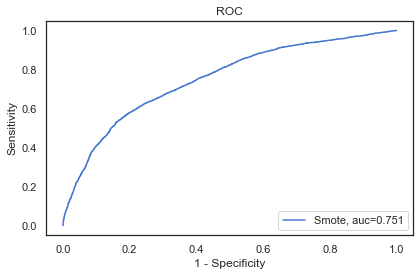

In [73]:
# ROC Curve
svm_p = SVC(probability = True) # for probability
clf_p = svm_p.fit(X_train_sm, y_train_sm.ravel()) # for probability

pred_proba = svm_p.predict_proba(X_val_sm)[::,1]
fpr, tpr, _ = roc_curve(y_val_sm,  pred_proba)
auc = roc_auc_score(y_val_sm, pred_proba)
plt.plot(fpr,tpr,label="Smote, auc="+str(np.round(auc,3)))
plt.legend(loc=4)
plt.ylabel('Sensitivity')
plt.xlabel('1 - Specificity')
plt.title('ROC')
plt.tight_layout()


In [74]:
# --------------------------------homework------------------------------------------------------

# repeat the modelling for df2 with scaling

# columns should be 14

#split into 70:30 ratio 
X_train_sm, X_val_sm, y_train_sm, y_val_sm = train_test_split(X_scaled, y_sm, test_size = 0.3, random_state = 0)

t1 = time.time()
# Naked Modelling

svm = SVC() #SVC(kernel='linear') 

clf = svm.fit(X_train_sm, y_train_sm.ravel()) 
score1 = svm.score(X_train_sm, y_train_sm)
score2 = svm.score(X_val_sm, y_val_sm)
pred = svm.predict(X_val_sm) 
  
# print classification report 
print('With SMOTE:'.upper())
print('train accuracy: ', score1)
print('test accuracy: ', score2)
print('F1 score:\n', classification_report(y_val_sm, pred)) 
print('*'*80)
#print('\n')


WITH SMOTE:
train accuracy:  0.6874560518511724
test accuracy:  0.6822883229902276
F1 score:
               precision    recall  f1-score   support

           0       0.68      0.67      0.68      6952
           1       0.68      0.69      0.69      7067

    accuracy                           0.68     14019
   macro avg       0.68      0.68      0.68     14019
weighted avg       0.68      0.68      0.68     14019

********************************************************************************


In [75]:
#-------------------------------------------------------------------------------------------
# repeat the modelling for df2 with scaling for all numerical --- create df2_ without clubbing
dataCAT_original = data_original[catCols]
data_allNumeric = pd.concat([dataCAT_original, dataNUM_], axis = 1)
data_allNumeric['Default_Payment'] = data['Default_Payment']

X = data_allNumeric.iloc[:,0:-1]
y = data_allNumeric['Default_Payment']

X = df_.iloc[:,0:-1]   # why has this been used heer  ?????????????????????????
y = df_['Default_Payment']        # why has this been used heer  ?????????????????????????

sm = SMOTE(random_state = 2) 
X_sm, y_sm = sm.fit_sample(X, y.ravel()) 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range  =(-1,1)).fit(X_sm)
Xscaled = scaler.transform(X_sm)


#split into 70:30 ratio 
X_train_sm, X_val_sm, y_train_sm, y_val_sm = train_test_split(Xscaled, y_sm, test_size = 0.3, random_state = 0)

t1 = time.time()
# Naked Modelling

svm = SVC() #SVC(kernel='linear') 

clf = svm.fit(X_train_sm, y_train_sm.ravel()) 
score1 = svm.score(X_train_sm, y_train_sm)
score2 = svm.score(X_val_sm, y_val_sm)
pred = svm.predict(X_val_sm) 
  
# print classification report 
print('With SMOTE:'.upper())
print('train accuracy: ', score1)
print('test accuracy: ', score2)
print('F1 score:\n', classification_report(y_val_sm, pred)) 
print('*'*80)
#print('\n')

WITH SMOTE:
train accuracy:  0.6876700602280718
test accuracy:  0.6806476924174335
F1 score:
               precision    recall  f1-score   support

           0       0.68      0.68      0.68      6952
           1       0.69      0.68      0.68      7067

    accuracy                           0.68     14019
   macro avg       0.68      0.68      0.68     14019
weighted avg       0.68      0.68      0.68     14019

********************************************************************************


GRID SEARCH WITH SMOTE:
Using best parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Train accuracy: 0.715
Test accuracy: 0.694
F1 score:
               precision    recall  f1-score   support

           0       0.68      0.71      0.70      6952
           1       0.70      0.68      0.69      7067

    accuracy                           0.69     14019
   macro avg       0.69      0.69      0.69     14019
weighted avg       0.69      0.69      0.69     14019

********************************************************************************


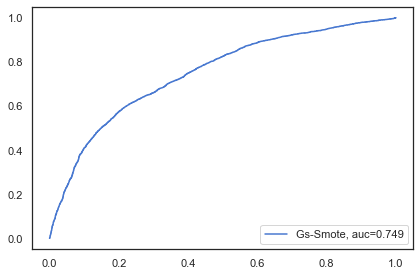

In [80]:
#### GRID SEARCH WITH SMOTE for SVM---------------------------------------------------
t3 = time.time()

from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn import metrics

parameters = {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma' : [0.001, 0.01, 0.1, 1], 'kernel': ['rbf', 'linear']}
svm_gs = GridSearchCV(svm,parameters)
svm_gs.fit(X_train_sm,y_train_sm)
preds = svm_gs.predict(X_val_sm)
score3 = svm_gs.score(X_train_sm, y_train_sm)
score4 = svm_gs.score(X_val_sm, y_val_sm)
predG = svm_gs.predict(X_val_sm)

print('GRID SEARCH WITH SMOTE:')
print('Using best parameters:',svm_gs.best_params_)
print('Train accuracy:', np.round(score3,3))
print('Test accuracy:', np.round(score4,3))
print('F1 score:\n', classification_report(y_val_sm, predG)) 

# ROC Curve
svm_p = SVC(probability = True) # for probability
clf_p = svm_p.fit(X_train_sm, y_train_sm.ravel()) 
pred_proba_gs = svm_p.predict_proba(X_val_sm)[::,1]
fpr_gs, tpr_gs, _ = roc_curve(y_val_sm,  pred_proba_gs)
auc_gs = roc_auc_score(y_val_sm, pred_proba_gs)
plt.plot(fpr_gs,tpr_gs,label="Gs-Smote, auc="+str(np.round(auc_gs,3)))
plt.legend(loc=4)
plt.tight_layout()
print('*'*80)

GRID SEARCH WITH SMOTE & CROSS VALIDATION -- DT:
Using best parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Train accuracy: 0.715
Test accuracy: 0.694
F1 score:
               precision    recall  f1-score   support

           0       0.68      0.71      0.70      6952
           1       0.70      0.68      0.69      7067

    accuracy                           0.69     14019
   macro avg       0.69      0.69      0.69     14019
weighted avg       0.69      0.69      0.69     14019



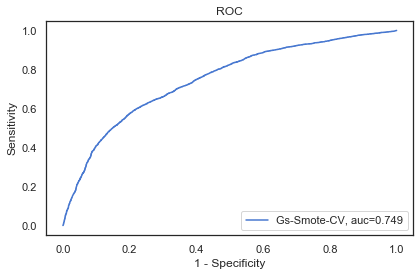

In [81]:
#### GRID SEARCH WITH SMOTE with CROSS VALIDATION---------------------------------
t5 = time.time()

def SVM_gridSearch(X,y,nfolds):
    #create a dictionary of all values we want to test
    parameters = {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma' : [0.001, 0.01, 0.1, 1], 'kernel': ['rbf', 'linear']}
    # decision tree model
    svm = SVC()
    #use gridsearch to val all values
    svm_gscv = GridSearchCV(svm, parameters, cv=nfolds)
    #fit model to data
    svm_gscv.fit(X, y)
    #find score
    accuracy = svm_gscv.score(X, y)
    
    return svm_gscv.best_params_, accuracy, svm_gscv

print('GRID SEARCH WITH SMOTE & CROSS VALIDATION -- DT:')
best_param, score5, svm_gscv = SVM_gridSearch(X_train_sm,y_train_sm, 4)
score6 = svm_gscv.score(X_val_sm, y_val_sm)
predGC = svm_gscv.predict(X_val_sm)
print('Using best parameters:',best_param)
print('Train accuracy:', np.round(score5,3))
print('Test accuracy:', np.round(score6,3))
print('F1 score:\n', classification_report(y_val_sm, predGC))

## ROC curve
svm_pp = SVC(probability = True) # for probability
clf_p = svm_pp.fit(X_train_sm, y_train_sm.ravel()) 
pred_proba_gsp = svm_pp.predict_proba(X_val_sm)[::,1]

fpr_gscv, tpr_gscv, _ = roc_curve(y_val_sm,  pred_proba_gsp)
auc_gscv = metrics.roc_auc_score(y_val_sm, pred_proba_gsp)
plt.plot(fpr_gscv,tpr_gscv,label="Gs-Smote-CV, auc="+str(np.round(auc_gscv,3)))
plt.legend(loc=4)
plt.ylabel('Sensitivity')
plt.xlabel('1 - Specificity')
plt.title('ROC')
plt.tight_layout()
